In [23]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from matplotlib.patches import Patch
import numpy, sys; print(numpy.__file__)
#from setup_japanese_font import setup_japanese_font
#setup_japanese_font()


# Google Driveを使う場合は以下を先に実行
# from google.colab import drive
# drive.mount('/content/drive')
# results_path = '/content/drive/MyDrive/GrayScottML/results/analysis_results_phase2.pkl'

results_path = '/Users/miura/Library/CloudStorage/GoogleDrive-miuratakashilab@gmail.com/マイドライブ/GrayScottML/phase2_results_last64_gpu.pkl'  # パスを適宜修正

with open(results_path, 'rb') as f:
    results = pickle.load(f)

latent_vectors = results['latent_vectors']
f_values = results['f_values']
k_values = results['k_values']

n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(latent_vectors)
silhouette = silhouette_score(latent_vectors, cluster_labels)
print(f"Silhouette Score (k=3): {silhouette:.3f}")

pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(latent_vectors)
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_result = tsne.fit_transform(latent_vectors)


/Users/miura/.pyenv/versions/3.12.5/envs/newest/lib/python3.12/site-packages/numpy/__init__.py
Silhouette Score (k=3): 0.752


クラスター0のサンプル数: 1350
全体に占める割合: 34.6%


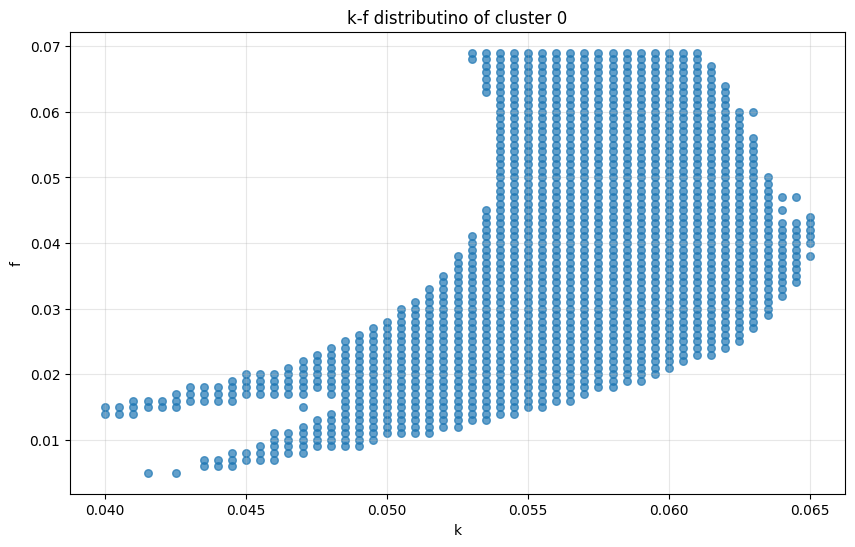

f値の範囲: 0.0050 - 0.0690
k値の範囲: 0.0400 - 0.0650


In [24]:
# クラスター0のデータを抽出
cluster_0_mask = cluster_labels == 1
cluster_0_indices = np.where(cluster_0_mask)[0]
cluster_0_latent = latent_vectors[cluster_0_mask]
cluster_0_f_values = f_values[cluster_0_mask]
cluster_0_k_values = k_values[cluster_0_mask]

print(f"クラスター0のサンプル数: {len(cluster_0_indices)}")
print(f"全体に占める割合: {len(cluster_0_indices)/len(cluster_labels)*100:.1f}%")

# クラスター0のf-k分布を確認
plt.figure(figsize=(10, 6))
plt.scatter(cluster_0_k_values, cluster_0_f_values, alpha=0.7, s=30)
plt.xlabel('k')
plt.ylabel('f')
plt.title('k-f distributino of cluster 0')
plt.grid(True, alpha=0.3)
plt.show()

# クラスター0の統計情報
print(f"f値の範囲: {cluster_0_f_values.min():.4f} - {cluster_0_f_values.max():.4f}")
print(f"k値の範囲: {cluster_0_k_values.min():.4f} - {cluster_0_k_values.max():.4f}")


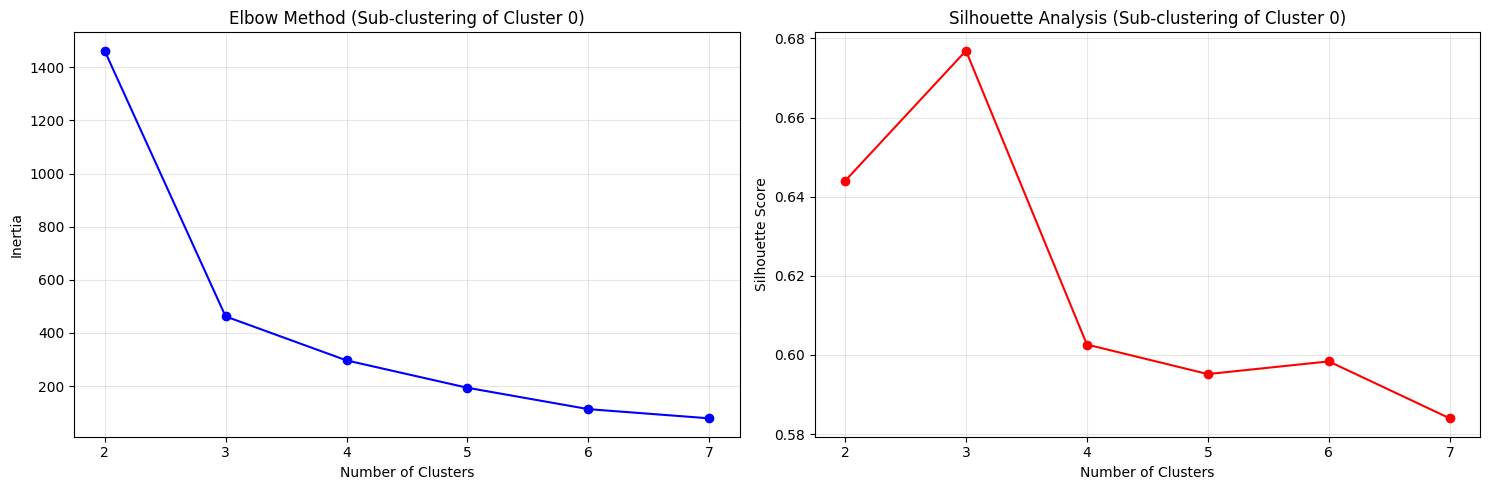

最適なサブクラスター数: 3
最大シルエット係数: 0.677

クラスター数とシルエット係数:
k=2: 0.644
k=3: 0.677
k=4: 0.603
k=5: 0.595
k=6: 0.598
k=7: 0.584


In [25]:
# クラスター0のサブクラスタリング
# 最適なクラスター数を決定するためのエルボー法とシルエット分析

from sklearn.metrics import silhouette_score

# クラスター数の候補
k_range = range(2, 8)
inertias = []
silhouette_scores = []

for k in k_range:
    kmeans_sub = KMeans(n_clusters=k, random_state=42, n_init=10)
    sub_labels = kmeans_sub.fit_predict(cluster_0_latent)
    inertias.append(kmeans_sub.inertia_)
    silhouette_scores.append(silhouette_score(cluster_0_latent, sub_labels))

# 結果をプロット
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# エルボー法
ax1.plot(k_range, inertias, 'bo-')
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Inertia')
ax1.set_title('Elbow Method (Sub-clustering of Cluster 0)')
ax1.grid(True, alpha=0.3)

# シルエット分析
ax2.plot(k_range, silhouette_scores, 'ro-')
ax2.set_xlabel('Number of Clusters')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Analysis (Sub-clustering of Cluster 0)')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 最適なクラスター数を選択（シルエット係数が最大のもの）
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"最適なサブクラスター数: {optimal_k}")
print(f"最大シルエット係数: {max(silhouette_scores):.3f}")

# シルエット係数の詳細表示
print("\nクラスター数とシルエット係数:")
for k, score in zip(k_range, silhouette_scores):
    print(f"k={k}: {score:.3f}")


In [26]:
# cluster_0_latentをファイルに保存
np.savetxt('cluster_0_latent.csv', cluster_0_latent, delimiter=',')
print("cluster_0_latentを保存しました")

# cluster_0_k_valuesをファイルに保存
np.savetxt('cluster_0_k_values.csv', cluster_0_k_values, delimiter=',')
print("cluster_0_k_valuesを保存しました")

# cluster_0_f_valuesをファイルに保存
np.savetxt('cluster_0_f_values.csv', cluster_0_f_values, delimiter=',')
print("cluster_0_f_valuesを保存しました")

# まとめて保存（推奨）
np.savez('cluster_0_data.npz',
         latent=cluster_0_latent,
         k=cluster_0_k_values,
         f=cluster_0_f_values,
         indices=cluster_0_indices)
print("cluster_0_data.npz を保存しました (indices含む)")

cluster_0_latentを保存しました
cluster_0_k_valuesを保存しました
cluster_0_f_valuesを保存しました
cluster_0_data.npz を保存しました (indices含む)
